In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Display the data table for preview using nunique to dont repeat the same Mouse ID
unique_mice_count = merge_df['Mouse ID'].nunique()
print(f"Unique Mice Count: {unique_mice_count}")

Unique Mice Count: 249


In [4]:
# Checking the number of mice with the duplicated function identifying the duplicate mice by their ID.
duplicate_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(f"Duplicate Mice: {duplicate_mice}")

# Clenaing the data by dropping the duplicates
cleaned_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Checking the number of mice after cleaning the data
unique_mice_count = cleaned_df['Mouse ID'].nunique()

# Diplaying the number of unique mice one more time to have a clean data set with all the charts
print(f"Unique Mice Count: {unique_mice_count}")

Duplicate Mice:     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           4

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

#Calculating the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_tumor_volume = grouped_regimen.mean()
median_tumor_volume = grouped_regimen.median()
variance_tumor_volume = grouped_regimen.var()
std_dev_tumor_volume = grouped_regimen.std()
sem_tumor_volume = grouped_regimen.sem()
# Summary statistics table
summary_stats = pd.DataFrame({
    'mean': Mean_tumor_volume,
    'median': median_tumor_volume,
    'variance': variance_tumor_volume,
    'standard deviation': std_dev_tumor_volume,
    'SEM': sem_tumor_volume
})
# Save the summary stats table to a csv file
summary_stats.to_csv('summary_stats.csv', index=True)
print(summary_stats)


                   mean     median   variance  standard deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


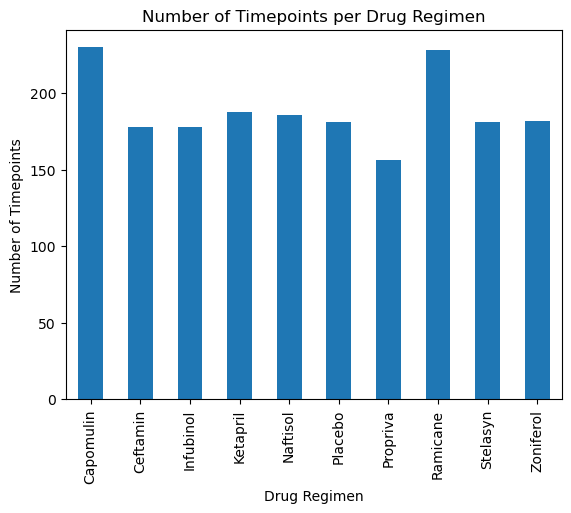

In [6]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Grouping the data by Drug Regimen and counting the number of timepoints into a new DataFrame 
timepoints_per_regimen = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
#Displaying the new DataFrame Chart
print(timepoints_per_regimen)
#Getting the the bar plot using Pandas
timepoints_per_regimen.plot(kind='bar', title='Number of Timepoints per Drug Regimen')
#Adding the labels to the chart Y axis = Drug Regimen and X axis = Number of Timepoints
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

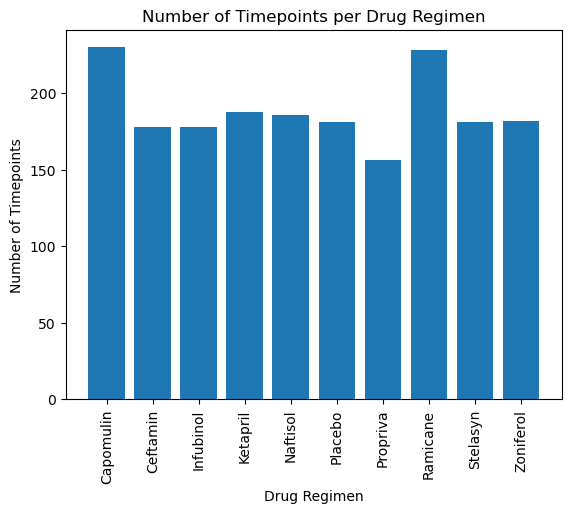

In [7]:
#Create a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Getting the bar plot using Pyplot
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen)
plt.xticks(rotation=90)
# Adding the title to the chart with the labels X and Y axis
plt.title('Number of Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
#Printing the chart
plt.show()

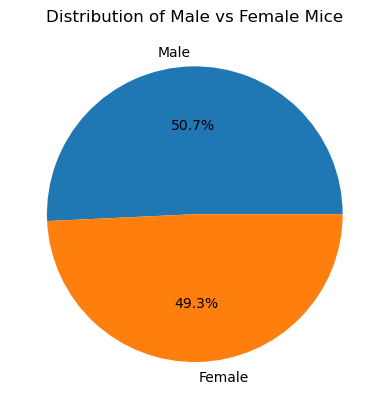

In [9]:
#Create a pie plot showing the distribution of unique female versus male mice using Pandas
# Getting the sex distribution counts and plotting the pie chart
sex_distribution = cleaned_df['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Male vs Female Mice')
plt.ylabel('')
plt.show()


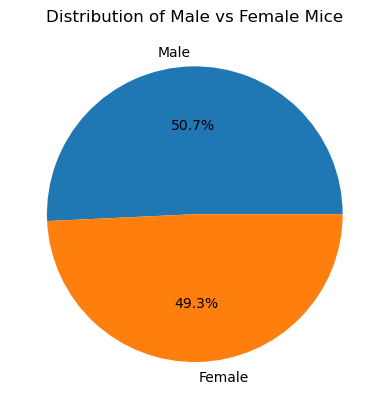

In [14]:
#Identical pie plot showing the sex distribution  
plt.pie(sex_distribution.values, labels=sex_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Male vs Female Mice')
plt.show()

In [15]:
#Identify 4 treatnments regimens to analyze
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [16]:
#Create a Dataframe that shows the last (greates) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


In [20]:
#Merge the two dataframes to get the final tumor volume data
final_tumor_volume_df = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')


In [24]:
#List to store the final tumor volume for each of the 4 treatment regimens
tumor_volumes_list = []
print(final_tumor_volume_df)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435         10     Propriva  Female          12          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   
247     z795         45     Naftisol  Female          13          29   
248     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

In [49]:
tumor_volumes_list = []
#Iterating through the treatment regimens to get the final tumor volume for each of the 4 treatment regimens
for drug in treatment_regimens:
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    #Check if the treatment data is empty
    if treatment_data.empty:
        print(f"No data found for treatment: {drug}")
    else:
        tumor_volumes_list.append(treatment_data.values)


In [27]:
treatment_data = final_tumor_volume_df['Tumor Volume (mm3)']
tumor_volumes_list.append(treatment_data)   
print(tumor_volumes_list)

[3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64, 0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64, 0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64]


In [30]:
#Quartile calculations
quantiles = treatment_data.quantile([0.25,0.5,0.75])
lowerq = quantiles[0.25]
upperq = quantiles[0.75]
iqr = upperq - lowerq
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")

Lower Quartile: 45.93471217
Upper Quartile: 64.95756185
IQR: 19.022849680000007


In [31]:
#Outlier calculations
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 17.400437649999986
Upper Bound: 93.49183637000002


In [32]:
outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
print(f"{drug} outliers: {outliers}")
print(outliers)
print()

Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)



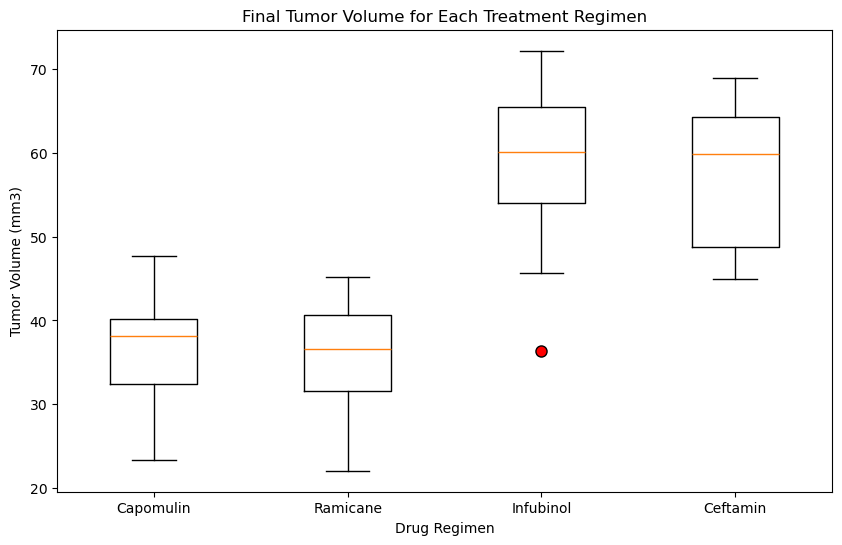

In [50]:
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volumes_list[:len(treatment_regimens)], labels=treatment_regimens, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

In [52]:
# Check the length of tumor_volumes_list
print(f"Number of treatment groups: {len(tumor_volumes_list)}")
for i, volumes in enumerate(tumor_volumes_list):
    print(f"Treatment: {treatment_regimens[i]}, Number of Data Points: {len(volumes)}")

# Ensure all treatments are present
print("Tumor Volumes List Content:")
print(tumor_volumes_list)


Number of treatment groups: 4
Treatment: Capomulin, Number of Data Points: 25
Treatment: Ramicane, Number of Data Points: 25
Treatment: Infubinol, Number of Data Points: 25
Treatment: Ceftamin, Number of Data Points: 25
Tumor Volumes List Content:
[array([38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203 ,
       47.68596303, 37.31184577, 38.1251644 , 38.75326548, 41.48300765,
       38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684,
       41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294,
       40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384 ]), array([38.4076183 , 43.0475426 , 38.81036633, 32.97852192, 38.34200823,
       33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217,
       36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509,
       31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077,
       30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]), array([67.97341878, 65.5257

In [51]:
print(final_tumor_volume_df['Drug Regimen'].unique())


['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [60]:
#Select a mouse that was treated with Capomulin
capomulin_mouse = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[0]
#Print the mouse ID B128
print(f"Capomulin Mouse: {capomulin_mouse}")


Capomulin Mouse: b128


In [59]:
#Extracting the tumor volume data for the selected mouse
capomulin_mouse_data = cleaned_df[cleaned_df['Mouse ID'] == capomulin_mouse]
print(capomulin_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
300     b128    Capomulin  Female           9          22          0   
301     b128    Capomulin  Female           9          22          5   
302     b128    Capomulin  Female           9          22         10   
303     b128    Capomulin  Female           9          22         15   
304     b128    Capomulin  Female           9          22         20   
305     b128    Capomulin  Female           9          22         25   
306     b128    Capomulin  Female           9          22         30   
307     b128    Capomulin  Female           9          22         35   
308     b128    Capomulin  Female           9          22         40   
309     b128    Capomulin  Female           9          22         45   

     Tumor Volume (mm3)  Metastatic Sites  
300           45.000000                 0  
301           45.651331                 0  
302           43.270852                 0  
303           43.784893        

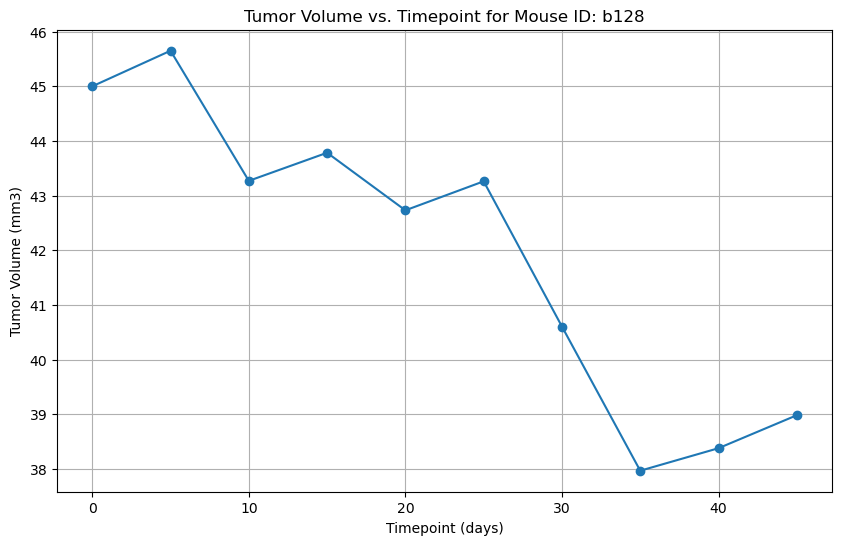

In [57]:
#Generate a line plot of tumor volume vs. time point for the selected mouse treated with Capomulin
plt.figure(figsize=(10,6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID: {capomulin_mouse}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True) 
plt.show()

In [72]:
# Average tumor volume for each mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
print(capomulin_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

In [76]:
#Combine the 2 datasets into a single DataFrame
capomulin_avg_vol_weight = pd.merge(average_tumor_volume, mouse_weight, left_index=True, right_index=True)
print(capomulin_avg_vol_weight)

          Tumor Volume (mm3)  Weight (g)
Mouse ID                                
b128               41.963636          22
b742               40.083699          21
f966               36.505973          17
g288               41.990097          19
g316               44.613344          22
i557               44.805810          24
i738               39.141053          20
j119               44.465236          23
j246               43.216925          21
l509               44.434474          21
l897               42.507261          19
m601               34.847470          17
m957               39.049816          19
r157               45.798970          25
r554               36.509212          17
r944               43.367364          25
s185               34.559143          17
s710               42.803733          23
t565               39.328725          17
u364               39.887495          17
v923               41.581595          21
w150               41.384825          23
w914            

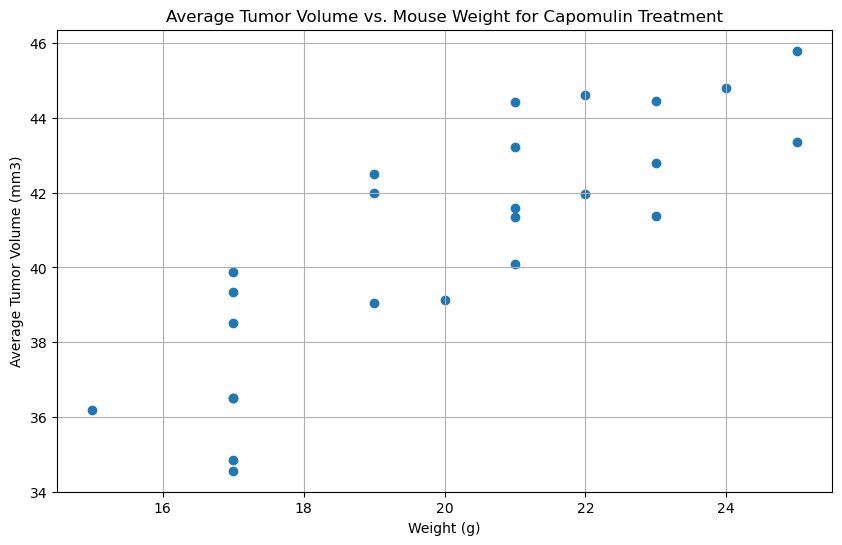

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg_vol_weight['Weight (g)'], capomulin_avg_vol_weight['Tumor Volume (mm3)'], marker='o')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


In [80]:
#Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = capomulin_avg_vol_weight['Weight (g)'].corr(capomulin_avg_vol_weight['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.8419363424694722


In [82]:
#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg_vol_weight['Weight (g)'], capomulin_avg_vol_weight['Tumor Volume (mm3)'])
print(f"Slope: {slope}")

Slope: 0.9544396890241049


In [83]:
regression_line = capomulin_avg_vol_weight['Weight (g)'] * slope + intercept
print(regression_line)

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


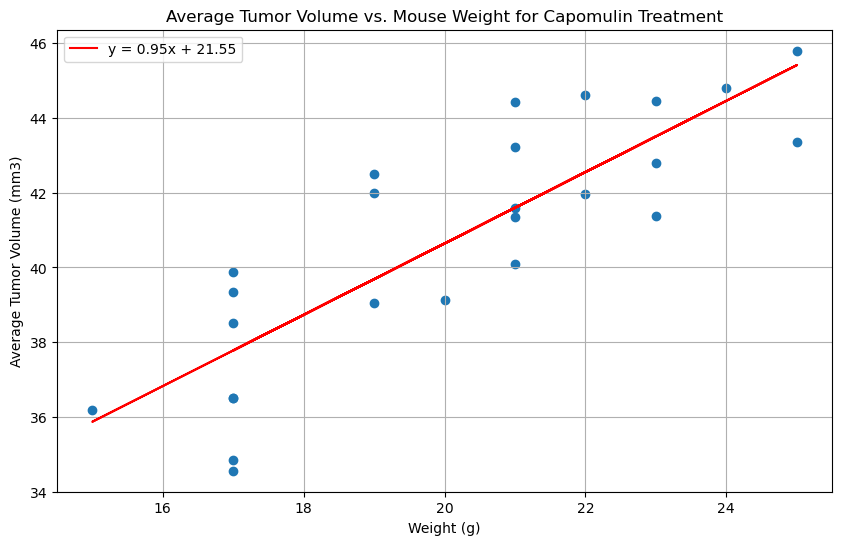

In [84]:
#Plotting the linear regression model on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg_vol_weight['Weight (g)'], capomulin_avg_vol_weight['Tumor Volume (mm3)'], marker='o')
plt.plot(capomulin_avg_vol_weight['Weight (g)'], regression_line, color='r', label=f'y = {round(slope, 2)}x + {round(intercept, 2)}')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.show()
